<a href="https://colab.research.google.com/github/Abi20601/Image-Video-Processing/blob/main/IVA_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

In [ ]:
paths = glob.glob('/content/drive/MyDrive/Fish_dataset/*.jpg',recursive=True)

(5, 1080, 1920, 3)


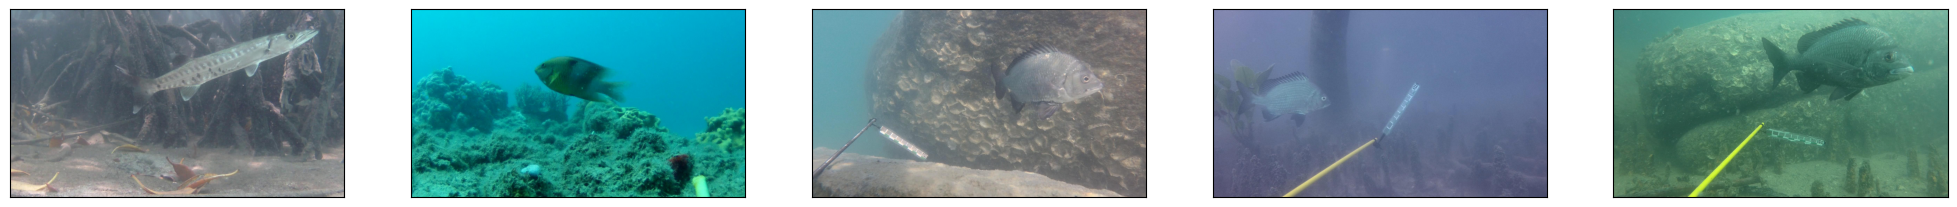

In [ ]:
orig = np.array([np.asarray(Image.open(img)) for img in paths])
plt.figure(figsize=(25,25))
print(orig.shape)
for i, img in enumerate(orig[0:5]):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  # plt.grid(False)
  plt.imshow(img)

plt.show()

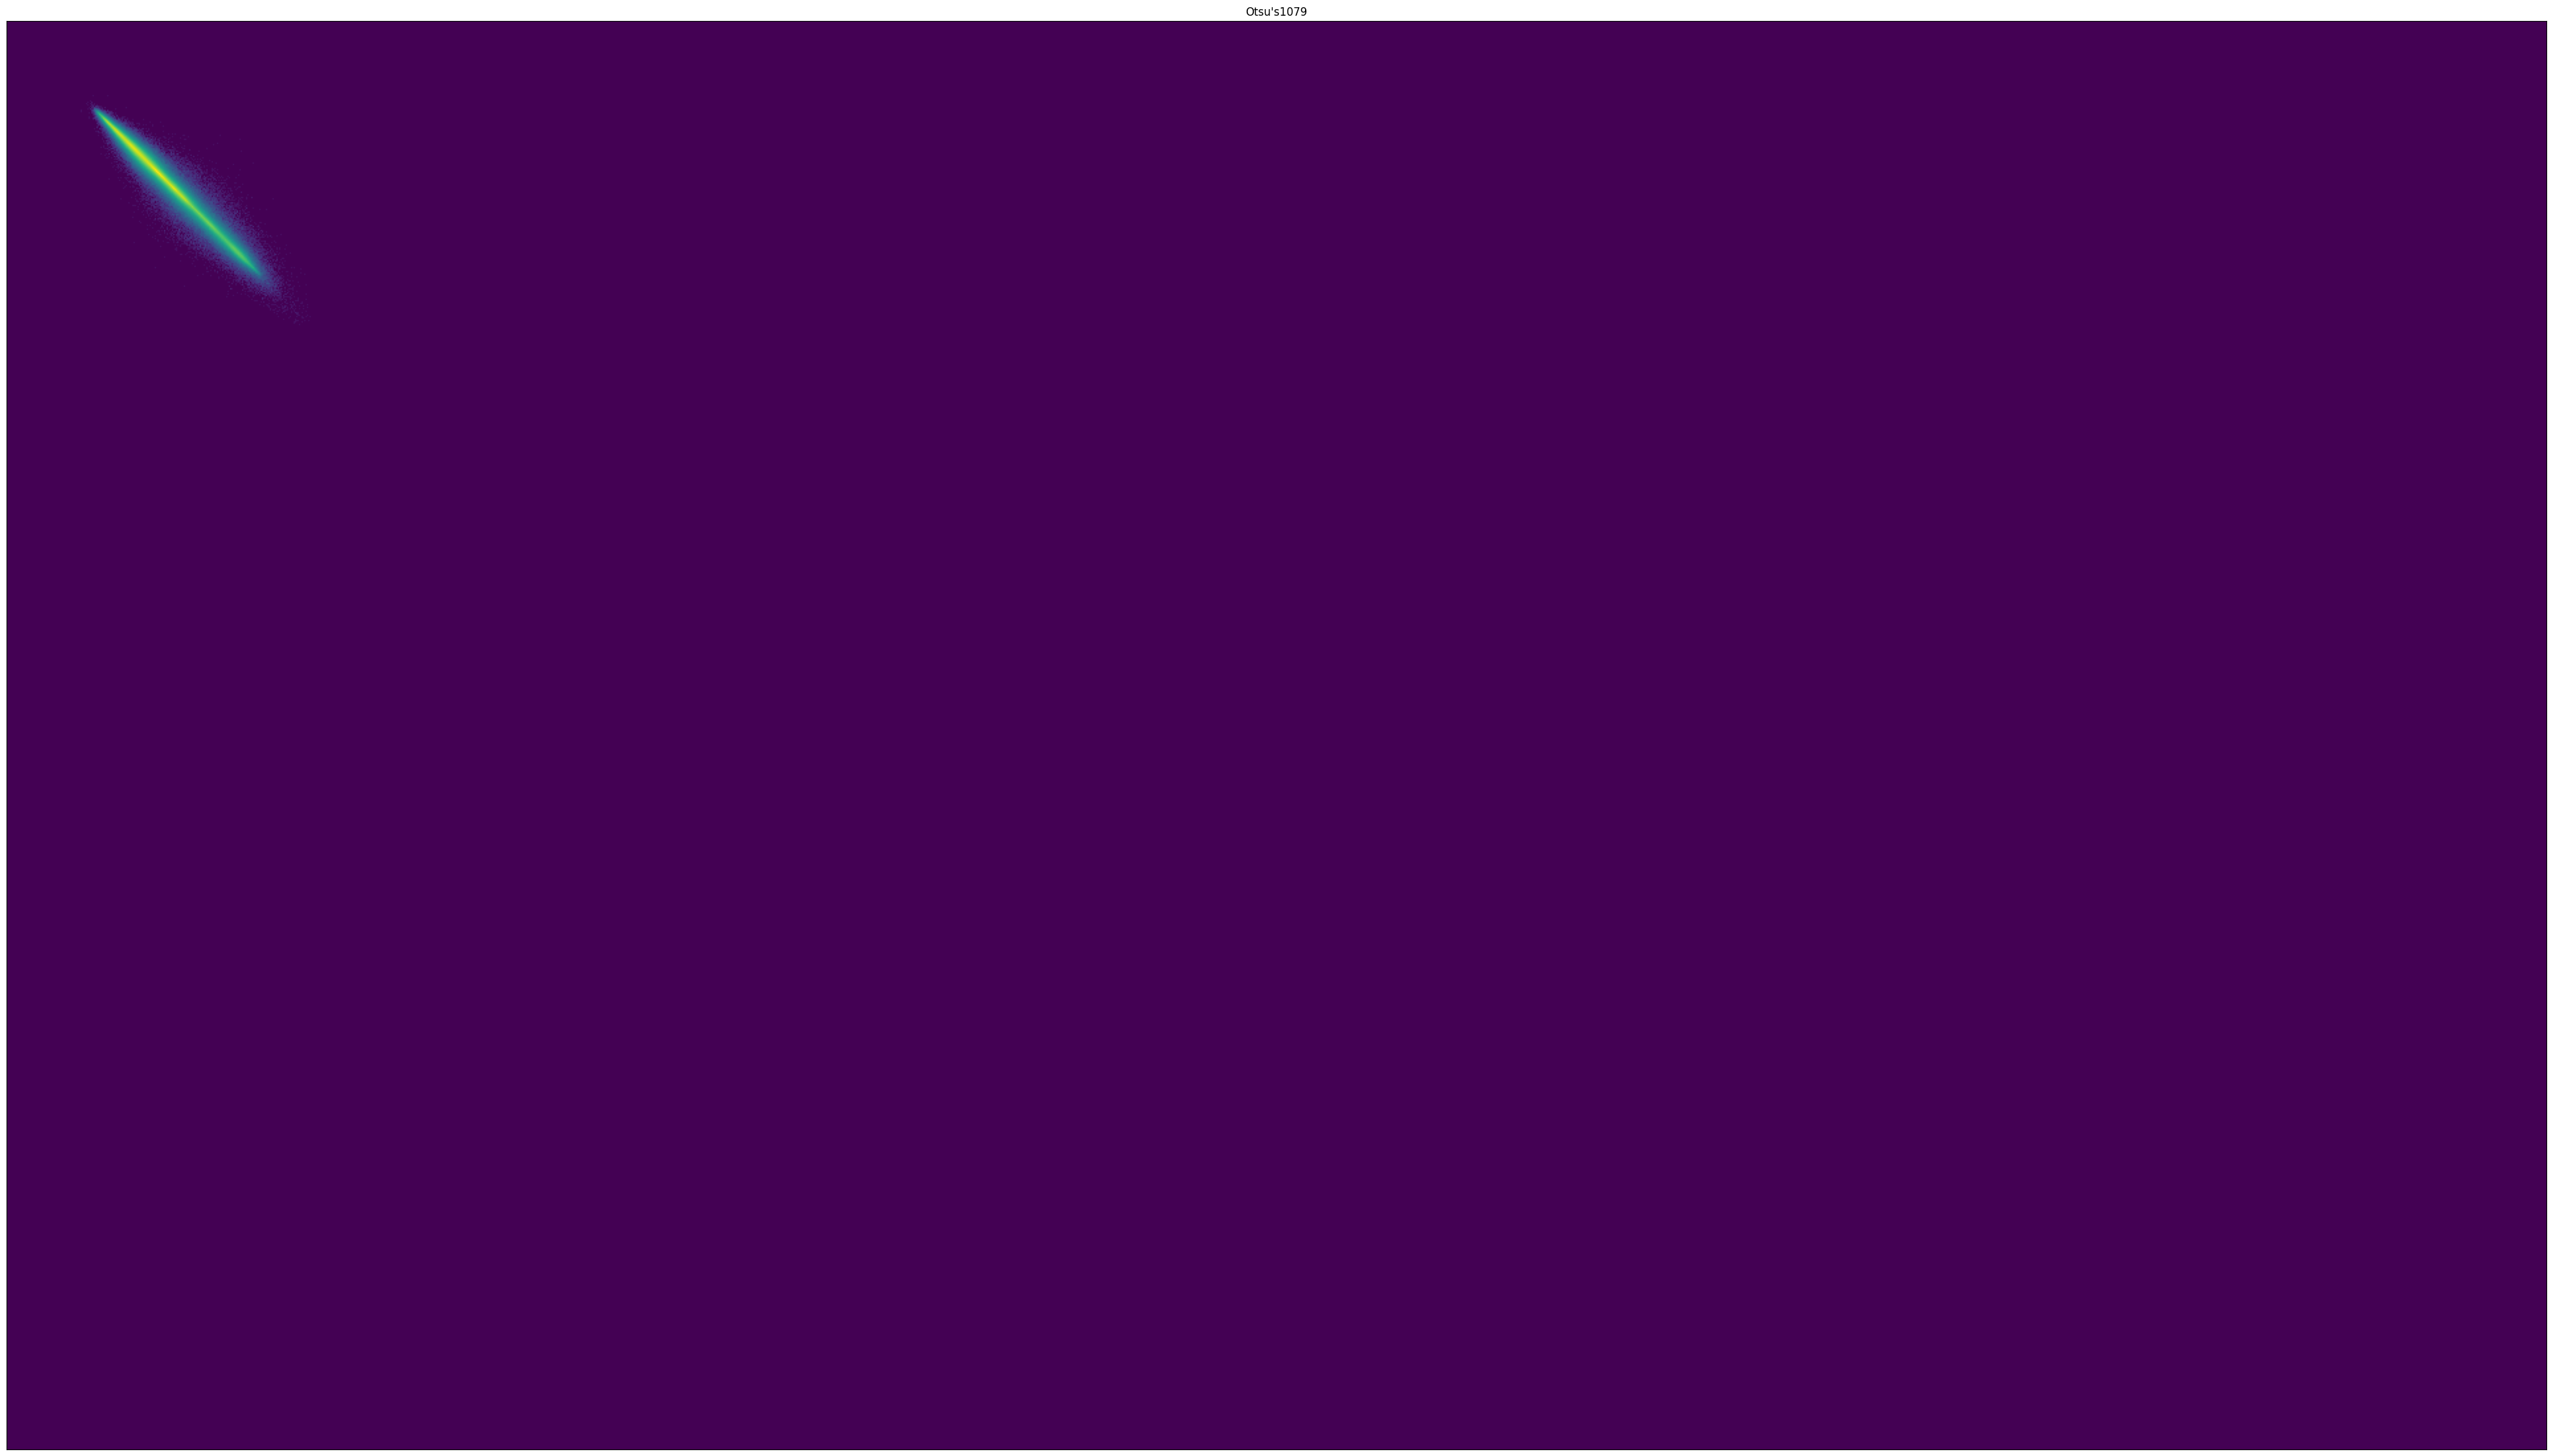

In [ ]:
plt.figure(figsize=(50,50))
for i in range(1,6):
  # load an image
  img_rgb = cv2.imread(f"/content/drive/MyDrive/Fish_dataset/01.jpg")
  # print(img_rgb.shape)
  # get img greyscale
  finl_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # plt.subplot(2, 5, i),plt.imshow(img_rgb)
  # plt.title(f"Image{i}"), plt.xticks([]), plt.yticks([])
  # choose a positional operator
  pos_op = [1,0]

  # init glcm array
  glcm = np.zeros([1080,1920])

  # iterate over image and complete glcm
  for i in range(finl_img.shape[0]): # row
      for j in range(finl_img.shape[1]): # col
          init_val = finl_img[i,j]
          try:
              target = finl_img[i+pos_op[0],j+pos_op[1]]
          except IndexError:
            continue # out of img bounds
          glcm[init_val,target]+=1

  glcm = glcm/np.sum(glcm)
  log1 = np.log(glcm+1e-6)
  # print(log1.shape)
  plt.imshow(log1)
  plt.title(f"Otsu's{i}"), plt.xticks([]), plt.yticks([])

  # plt.subplot(2, 5, i), plt.imshow(np.log(glcm+1e-6))
  # plt.title(f"Otsu's{i}"), plt.xticks([]), plt.yticks([])

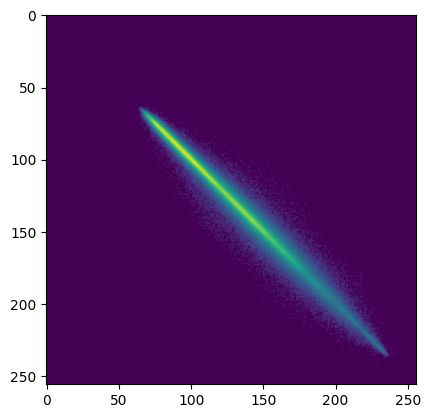

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# load an image
img_rgb = plt.imread("/content/drive/MyDrive/Fish_dataset/01.jpg")

# get img greyscale
finl_img = np.average(img_rgb,axis=2).astype(np.uint8)

# choose a positional operator
pos_op = [1,0]

# init glcm array
glcm = np.zeros([256,256])

# iterate over image and complete glcm
for i in range(finl_img.shape[0]): # row
    for j in range(finl_img.shape[1]): # col
        init_val = finl_img[i,j]
        try:
            target = finl_img[i+pos_op[0],j+pos_op[1]]
        except IndexError:
        	continue # out of img bounds
        glcm[init_val,target]+=1

glcm = glcm/np.sum(glcm)

plt.imshow(np.log(glcm+1e-6))
plt.show()

In [ ]:
glcm_img = np.full_like(imgs,0)
for i in range(6):
  plt.imshow(func(imgs[0]))

AxisError: ignored

In [ ]:
def calculate_glcm(images):

    # Args:
    #     images (list): List of image file paths.
    #     pos_op (list): Positional operator.

    pos_op=[1,0]
    glcms = []
    for img_path in images:
        # load an image
        img_rgb = plt.imread(img_path)

        # get img greyscale
        finl_img = np.average(img_rgb,axis=2).astype(np.uint8)

        # init glcm array
        glcm = np.zeros([256,256])

        # iterate over image and complete glcm
        for i in range(finl_img.shape[0]): # row
            for j in range(finl_img.shape[1]): # col
                init_val = finl_img[i,j]
                try:
                    target = finl_img[i+pos_op[0],j+pos_op[1]]
                except IndexError:
                    continue # out of img bounds
                glcm[init_val,target]+=1

        glcm = glcm/np.sum(glcm)
        glcms.append(glcm)

    return glcms

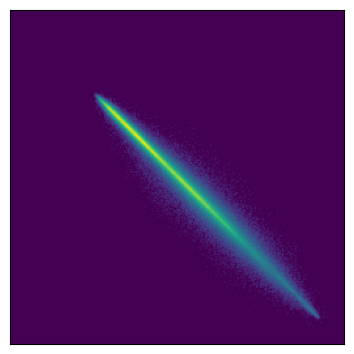

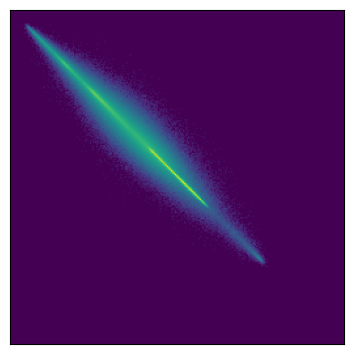

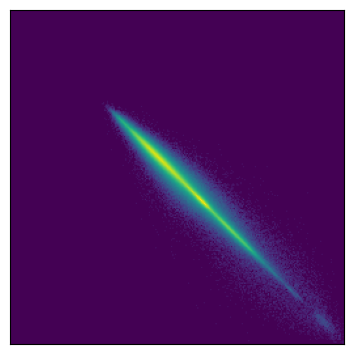

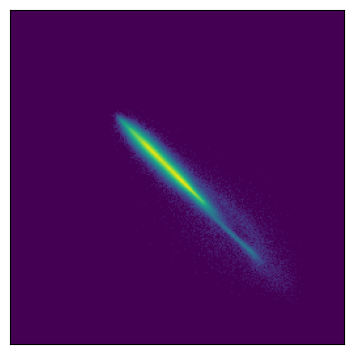

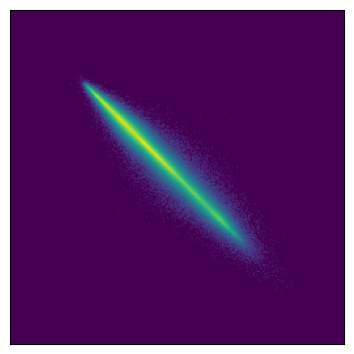

In [ ]:
image_files = []
for img in paths:
  image_files.append(img)

for i in range(5):
  plt.figure(figsize=(25,25))
  glcms = calculate_glcm(image_files)
# plot the first GLCM
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.log(glcms[i]+1e-6))
  plt.show()

In [ ]:
import skimage.feature as feature
import pandas as pd

x,y,z,a,b = [],[],[],[],[]

def glcm_stat(img):

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Param:
    # source image
    # List of pixel pair distance offsets - here 1 in each direction
    # List of pixel pair angles in radians
    graycom = feature.graycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)

    # Find the GLCM properties
    contrast = feature.graycoprops(graycom, 'contrast')
    dissimilarity = feature.graycoprops(graycom, 'dissimilarity')
    homogeneity = feature.graycoprops(graycom, 'homogeneity')
    energy = feature.graycoprops(graycom, 'energy')
    correlation = feature.graycoprops(graycom, 'correlation')
    ASM = feature.graycoprops(graycom, 'ASM')


    x.append(contrast[0].mean())
    y.append(dissimilarity[0].mean())
    z.append(homogeneity[0].mean())
    a.append(energy[0].mean())
    b.append(correlation[0].mean())

    data= {"Contrast": x,"Dissimilarity": y, "Homogeneity": z, "Energy" : a, "Correlation" : b}
    df = pd.DataFrame(data)
    return df

In [ ]:
data= {"Contrast": [],"Dissimilarity": [], "Homogeneity": [] , "Energy" : [] , "Correlation" : [] }
df1 = pd.DataFrame(data)
for i in range(5):
    df1 = glcm_stat(orig[i])
df1

,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,9.023171,1.660829,0.521598,0.047530,0.993936
1,33.137871,3.129214,0.493418,0.046217,0.988378
2,12.682984,2.147935,0.437026,0.041918,0.988457
3,7.602304,1.759516,0.471316,0.054734,0.982863
4,14.678258,2.363460,0.413757,0.037277,0.988941


In [ ]:
from pyimagesearch.searcher import Searcher
from pyimagesearch.zernikemoments import ZernikeMoments
import numpy as np
import argparse
import pickle
import imutils
import cv2
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-", "--index", required = True,
	help = "Path to where the index file will be stored")
ap.add_argument("-q", "--query", required = True,
	help = "Path to the query image")
args = vars(ap.parse_args())
# load the index
index = open(args["index"], "rb").read()
index = pickle.loads(index)
image = cv2.imread(args["query"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = imutils.resize(image, width = 64)
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
	cv2.THRESH_BINARY_INV, 11, 7)
# initialize the outline image, find the outermost
# contours (the outline) of the pokemon, then draw
# it
outline = np.zeros(image.shape, dtype = "uint8")
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
cv2.drawContours(outline, [cnts], -1, 255, -1)

ModuleNotFoundError: ignored